##Etude statistique

Nombre d'images

In [1]:
import os
from os.path import join, isfile

def nombre_images(folder_path):
    # Liste des fichiers dans le dossier
    files = [f for f in os.listdir(folder_path) if isfile(join(folder_path, f))]

    # Compter le nombre d'images
    image_count = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tif', '.tiff')))

    return image_count

if __name__ == "__main__":
    # Spécifier le chemin du dossier contenant les images
    folder_path = "/content/drive/MyDrive/non_végétaux/train/images"
    folder_path_ = "/content/drive/MyDrive/non_végétaux/valid/images"

    # Appeler la fonction pour compter le nombre d'images dans le dossier
    count = nombre_images(folder_path)+ nombre_images(folder_path_)

    print(f"Nombre d'images est: {count}")


Nombre d'images est: 899


Nombre d'annotations

In [2]:
import os
from os.path import join, isfile

def nombre_fichiers(folder_path):
    # Liste des fichiers dans le dossier
    files = [f for f in os.listdir(folder_path) if isfile(join(folder_path, f))]

    # Compter le nombre de fichiers
    file_count = sum(1 for file in files if file.lower().endswith(('.txt')))

    return file_count

if __name__ == "__main__":
    # Spécifier le chemin du dossier contenant les fichiers
    folder_path = "/content/drive/MyDrive/non_végétaux/train/labels"
    folder_path_ = "/content/drive/MyDrive/non_végétaux/valid/labels"

    # Appeler la fonction pour compter le nombre de fichiers dans le dossier
    count = nombre_fichiers(folder_path)+nombre_fichiers(folder_path_)

    print(f"Nombre de fichiers d'annotation: {count}")


Nombre de fichiers d'annotation: 897


Nombre d'occurences des classes des éléments non végétaux

In [3]:
import os
import pandas as pd

# Chemin vers le dossier contenant les fichiers d'annotations YOLO
annotations_folder = "/content/drive/MyDrive/non_végétaux/train/labels"
annotations_folder_ = "/content/drive/MyDrive/non_végétaux/valid/labels"

# Initialiser un dictionnaire pour stocker les statistiques par classe
class_stats = {}

# Parcourir tous les fichiers dans le dossier d'annotations
def occurence_classes(annotations_folder):
  for filename in os.listdir(annotations_folder):
      if filename.endswith(".txt"):
          file_path = os.path.join(annotations_folder, filename)

          # Ouvrir le fichier d'annotations
          with open(file_path, "r") as file:
              lines = file.readlines()

          # Parcourir chaque ligne du fichier d'annotations
          for line in lines:
              # Diviser la ligne en mots
              parts = line.split()

              # La première partie est la classe
              class_name = parts[0]

              # Vérifier si la classe est déjà dans le dictionnaire, sinon l'initialiser à 1
              if class_name not in class_stats:
                  class_stats[class_name] = 1
              else:
                  # Si la classe est déjà présente, incrémenter le compteur
                  class_stats[class_name] += 1

# Convertir le dictionnaire en un DataFrame pandas
  df = pd.DataFrame(list(class_stats.items()), columns=['Classe', 'Occurrences'])

  return df.style.set_properties(**{"border": "2px solid blue", "color": "black"})
print('statistique Train set')
occurence_classes(annotations_folder)

statistique Train set


,Classe,Occurrences
0,7,875
1,5,762
2,3,1048
3,0,732
4,8,123
5,4,227
6,9,86
7,1,66
8,6,307
9,2,3


In [4]:
print('statistique valid set')
occurence_classes(annotations_folder_)

statistique valid set


,Classe,Occurrences
0,7,978
1,5,848
2,3,1164
3,0,820
4,8,127
5,4,251
6,9,96
7,1,66
8,6,361
9,2,3


Statistiques descriptives sur la longueur et la largeur des images

In [6]:
from PIL import Image
import os
import pandas as pd

# Chemin vers le dossier contenant les images
images_folder = "/content/drive/MyDrive/non_végétaux/train/images"
images_folder_ = "/content/drive/MyDrive/non_végétaux/valid/images"
def statistiques(images_folder):
  # Initialiser une liste pour stocker les données sur la longueur et la largeur
  data = []

  # Parcourir tous les fichiers dans le dossier d'images
  for filename in os.listdir(images_folder):
      if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
          image_path = os.path.join(images_folder, filename)

          # Ouvrir l'image et obtenir ses dimensions
          with Image.open(image_path) as img:
              width, height = img.size

          # Ajouter les données à la liste
          data.append({
              'Image': filename,
              'Longueur': width,
              'Largeur': height
          })

  # Convertir la liste en un DataFrame pandas
  df = pd.DataFrame(data)

  # Afficher des statistiques descriptives
  print(df.describe())

  # Afficher une moyenne générale
  print("\nMoyenne générale :")
  print(df[['Longueur', 'Largeur']].mean())
print("Statistiques descriptives sur la longueur et la largeur des images du training set :")
statistiques(images_folder)
print("Statistiques descriptives sur la longueur et la largeur des images du test set :")
statistiques(images_folder_)

Statistiques descriptives sur la longueur et la largeur des images du training set :
       Longueur  Largeur
count     809.0    809.0
mean      640.0    640.0
std         0.0      0.0
min       640.0    640.0
25%       640.0    640.0
50%       640.0    640.0
75%       640.0    640.0
max       640.0    640.0

Moyenne générale :
Longueur    640.0
Largeur     640.0
dtype: float64
Statistiques descriptives sur la longueur et la largeur des images du test set :
       Longueur  Largeur
count      90.0     90.0
mean      640.0    640.0
std         0.0      0.0
min       640.0    640.0
25%       640.0    640.0
50%       640.0    640.0
75%       640.0    640.0
max       640.0    640.0

Moyenne générale :
Longueur    640.0
Largeur     640.0
dtype: float64


Statistiques descriptives sur la longueur et la largeur des classes

In [7]:
import os
import pandas as pd

# Chemin vers le dossier contenant les fichiers d'annotations YOLO
annotations_folder = "/content/drive/MyDrive/non_végétaux/train/labels"
annotations_folder_ = "/content/drive/MyDrive/non_végétaux/valid/labels"
def statistiques_classes(annotations_folder):
  # Initialiser une liste pour stocker les données sur la longueur et la largeur
  data = []

  # Parcourir tous les fichiers dans le dossier d'annotations
  for filename in os.listdir(annotations_folder):
      if filename.endswith(".txt"):
          file_path = os.path.join(annotations_folder, filename)

          # Ouvrir le fichier d'annotations
          with open(file_path, "r") as file:
              lines = file.readlines()

          # Parcourir chaque ligne du fichier d'annotations
          for line in lines:
              # Diviser la ligne en mots
              parts = line.split()

              # La première partie est la classe
              class_name = parts[0]

              # Les coordonnées suivantes sont x, y, largeur, hauteur
              x, y, width, height = map(float, parts[1:5])

              # Ajouter les données à la liste
              data.append({
                  'Classe': class_name,
                  'Longueur': width,
                  'Largeur': height
              })

  # Convertir la liste en un DataFrame pandas
  df = pd.DataFrame(data)
  # Afficher des statistiques descriptives
  print("Statistiques descriptives sur la longueur et la largeur des classes :")
  print(df.groupby('Classe').describe())

  # Afficher une moyenne générale
  print("\nMoyenne générale :")
  print(df[['Longueur', 'Largeur']].mean())
statistiques_classes(annotations_folder)
statistiques_classes(annotations_folder_)

Statistiques descriptives sur la longueur et la largeur des classes :
       Longueur                                                              \
          count      mean       std       min       25%       50%       75%   
Classe                                                                        
0         732.0  0.205866  0.124561  0.017188  0.078125  0.275000  0.321094   
1          66.0  0.045620  0.031214  0.015625  0.023438  0.038281  0.053711   
2           3.0  0.365625  0.008119  0.356250  0.363281  0.370312  0.370312   
3        1048.0  0.323599  0.127532  0.053125  0.209375  0.328906  0.414062   
4         227.0  0.217504  0.167572  0.015625  0.087500  0.146875  0.322266   
5         762.0  0.230434  0.175892  0.010937  0.068750  0.146094  0.380273   
6         307.0  0.149980  0.093195  0.025000  0.078125  0.109375  0.229687   
7         875.0  0.207660  0.065294  0.054688  0.196484  0.207813  0.219141   
8         123.0  0.132438  0.046081  0.059375  0.090625  0.13

Nombre de bounding boxes annotées pour chaque organe dans les deux ensemble Train et Test

Nombre total d'images d'entraînement : 809
Nombre total d'annotations d'entraînement : 4229
Moyenne d'annotations par image d'entraînement : 5.227441285537701
Nombre total d'images de test : 90
Nombre total d'annotations de test : 485
Moyenne d'annotations par image de test : 5.388888888888889


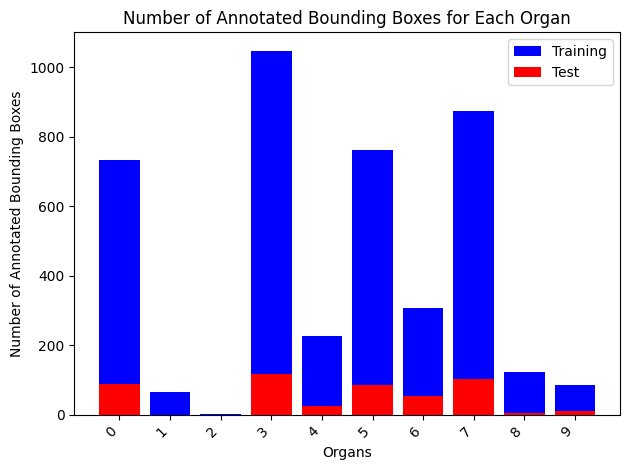

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        annotations = file.readlines()
    return annotations

def load_images(images_path):
    images_files = [f for f in os.listdir(images_path) if f.endswith((".jpg", ".png"))]
    images = [cv2.imread(os.path.join(images_path, img)) for img in images_files]
    return images

def extract_class_from_annotation(annotation_line):
    class_id = annotation_line.split()[0]
    return class_id

# Chemins vers les dossiers
train_annotations_path = "/content/drive/MyDrive/non_végétaux/train/labels"
train_images_path = "/content/drive/MyDrive/non_végétaux/train/images"

test_annotations_path = "/content/drive/MyDrive/non_végétaux/valid/labels"
test_images_path = "/content/drive/MyDrive/non_végétaux/valid/images"
# Charger les annotations et les images d'entraînement
train_annotations_files = [os.path.join(train_annotations_path, f) for f in os.listdir(train_annotations_path) if f.endswith(".txt")]
train_images = load_images(train_images_path)

# Charger les annotations et les images de test
test_annotations_files = [os.path.join(test_annotations_path, f) for f in os.listdir(test_annotations_path) if f.endswith(".txt")]
test_images = load_images(test_images_path)

# Statistiques de base pour les ensembles d'entraînement
num_train_images = len(train_images)
num_train_annotations = sum([len(load_annotations(f)) for f in train_annotations_files])
average_annotations_per_train_image = num_train_annotations / num_train_images

print(f"Nombre total d'images d'entraînement : {num_train_images}")
print(f"Nombre total d'annotations d'entraînement : {num_train_annotations}")
print(f"Moyenne d'annotations par image d'entraînement : {average_annotations_per_train_image}")

# Statistiques de base pour les ensembles de test
num_test_images = len(test_images)
num_test_annotations = sum([len(load_annotations(f)) for f in test_annotations_files])
average_annotations_per_test_image = num_test_annotations / num_test_images

print(f"Nombre total d'images de test : {num_test_images}")
print(f"Nombre total d'annotations de test : {num_test_annotations}")
print(f"Moyenne d'annotations par image de test : {average_annotations_per_test_image}")

all_train_classes = []
for annotation_file in train_annotations_files:
    annotations = load_annotations(annotation_file)
    classes = [extract_class_from_annotation(line) for line in annotations]
    all_train_classes.extend(classes)

unique_train_classes, train_class_counts = np.unique(all_train_classes, return_counts=True)

# Visualisation des classes pour les ensembles de test
all_test_classes = []
for annotation_file in test_annotations_files:
    annotations = load_annotations(annotation_file)
    classes = [extract_class_from_annotation(line) for line in annotations]
    all_test_classes.extend(classes)

unique_test_classes, test_class_counts = np.unique(all_test_classes, return_counts=True)

# Combine unique_train_classes and unique_test_classes to get a unique set of all classes
all_classes = np.unique(np.concatenate((unique_train_classes, unique_test_classes)))

# Create the figure and axes
fig, ax = plt.subplots()

# Create two sets of bars for training and test data
train_bars = ax.bar(unique_train_classes, train_class_counts, color='blue', label='Training')
test_bars = ax.bar(unique_test_classes, test_class_counts, color='red', label='Test')

# Add chart labels and title
ax.set_xlabel("Organs")
ax.set_ylabel("Number of Annotated Bounding Boxes")
ax.set_title("Number of Annotated Bounding Boxes for Each Organ")
ax.legend()

# Optional: Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

Histogramme des couleurs des images

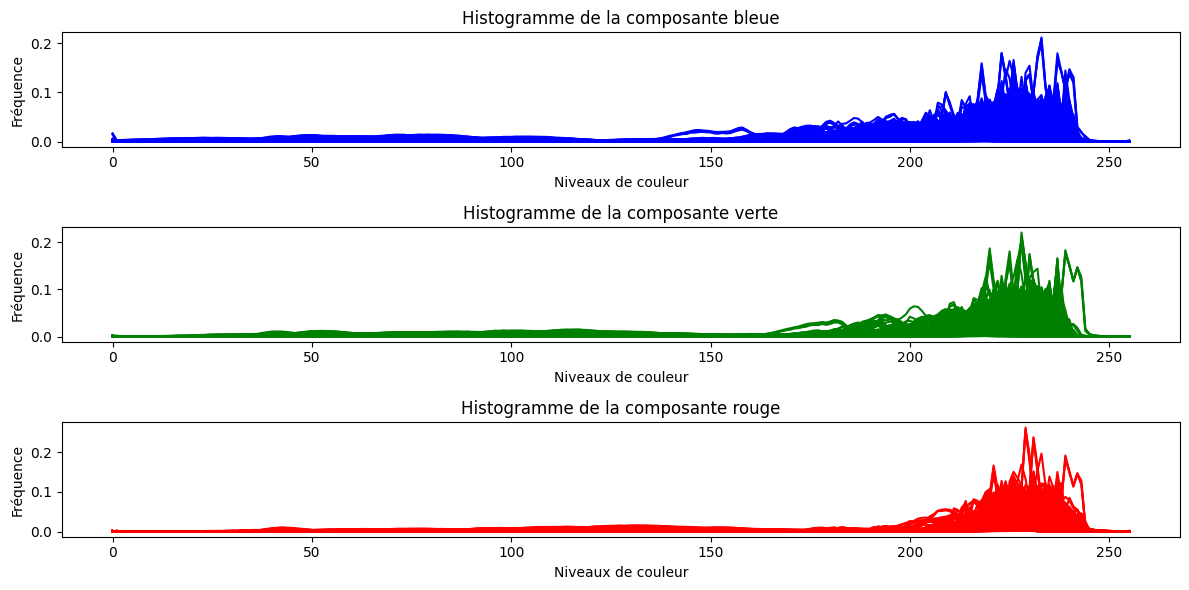

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le dossier contenant les images
images_folder = "/content/drive/MyDrive/non_végétaux/train/images"
images_folder_ = "/content/drive/MyDrive/non_végétaux/valid/images"
# Initialiser les listes pour stocker les histogrammes de couleurs
histogram_blue = []
histogram_green = []
histogram_red = []

# Parcourir tous les fichiers dans le dossier d'images
for filename in os.listdir(images_folder):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(images_folder, filename)

        # Charger l'image
        image = cv2.imread(image_path)

        # Calculer l'histogramme de couleurs
        hist_blue = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
        hist_red = cv2.calcHist([image], [2], None, [256], [0, 256])

        # Normaliser les histogrammes (facultatif)
        hist_blue = hist_blue / hist_blue.sum()
        hist_green = hist_green / hist_green.sum()
        hist_red = hist_red / hist_red.sum()

        # Ajouter les histogrammes à la liste
        histogram_blue.append(hist_blue.ravel())
        histogram_green.append(hist_green.ravel())
        histogram_red.append(hist_red.ravel())

for filename in os.listdir(images_folder_):
    if filename.endswith((".jpg", ".png")):
        image_path = os.path.join(images_folder_, filename)

        # Charger l'image
        image = cv2.imread(image_path)

        # Calculer l'histogramme de couleurs
        hist_blue = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
        hist_red = cv2.calcHist([image], [2], None, [256], [0, 256])

        # Normaliser les histogrammes (facultatif)
        hist_blue = hist_blue / hist_blue.sum()
        hist_green = hist_green / hist_green.sum()
        hist_red = hist_red / hist_red.sum()

        # Ajouter les histogrammes à la liste
        histogram_blue.append(hist_blue.ravel())
        histogram_green.append(hist_green.ravel())
        histogram_red.append(hist_red.ravel())

# Convertir les listes en un tableau numpy
histogram_blue = np.array(histogram_blue)
histogram_green = np.array(histogram_green)
histogram_red = np.array(histogram_red)

# Créer un histogramme cumulatif (facultatif)
cumulative_histogram_blue = np.cumsum(histogram_blue, axis=0)
cumulative_histogram_green = np.cumsum(histogram_green, axis=0)
cumulative_histogram_red = np.cumsum(histogram_red, axis=0)

# Afficher les histogrammes
plt.figure(figsize=(12, 6))

# Afficher l'histogramme bleu
plt.subplot(3, 1, 1)
plt.plot(histogram_blue.T, color='blue')  # Transposer pour avoir les niveaux de couleur en abscisse
plt.title('Histogramme de la composante bleue')
plt.xlabel('Niveaux de couleur')
plt.ylabel('Fréquence')

# Afficher l'histogramme vert
plt.subplot(3, 1, 2)
plt.plot(histogram_green.T, color='green')
plt.title('Histogramme de la composante verte')
plt.xlabel('Niveaux de couleur')
plt.ylabel('Fréquence')

# Afficher l'histogramme rouge
plt.subplot(3, 1, 3)
plt.plot(histogram_red.T, color='red')
plt.title('Histogramme de la composante rouge')
plt.xlabel('Niveaux de couleur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()